### [ Matplotlib 그래프 - 산점도 + 여러개 그래프 한번에! ]
- 데이터/피쳐들의 관계를 시각화
- 많은 피쳐를 한꺼번에 나타내면 해석이 어려움

In [1]:
## 모듈 로딩
import matplotlib.pyplot as plt
import koreanize_matplotlib  
import random
import pandas as pd

In [2]:
## 데이터 준비
xData=pd.Series( [ random.randint(1,50) for _ in range(50) ] )
yData=pd.Series( [ random.randint(1,50) for _ in range(50) ] )

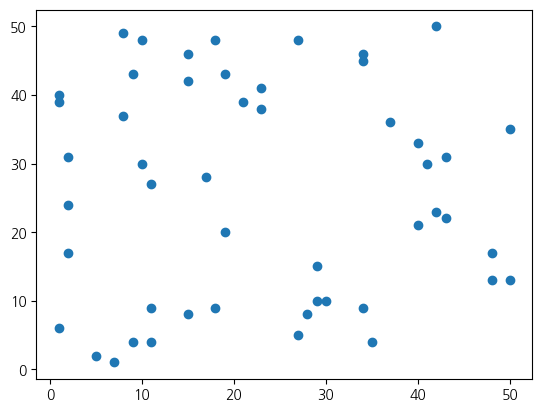

In [3]:
## 시각화  scatter(x, y)  : x와 y 교차 지점에 마커 출력
plt.scatter(xData, yData)
plt.show()

- auto_mpg 데이터셋에서 mpg 컬럼과 다른 컬럼의 관계를 시각화로 확인

In [4]:
# read_csv() 함수로 df 생성
df = pd.read_csv('../data/auto_mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
## horsepower 컬럼  '?'
dataDF=df.replace('?', pd.NA).dropna()
dataDF.shape

(392, 9)

In [6]:
## horsepower 자료형 변환 : object => float32
dataDF.horsepower=dataDF.horsepower.astype('float32')

dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float32
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
        
dataDF[['mpg','weight']].corr()

,mpg,weight
mpg,1.000000,-0.832244
weight,-0.832244,1.000000


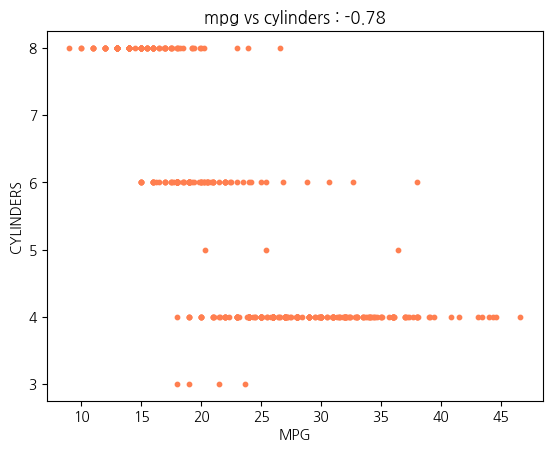

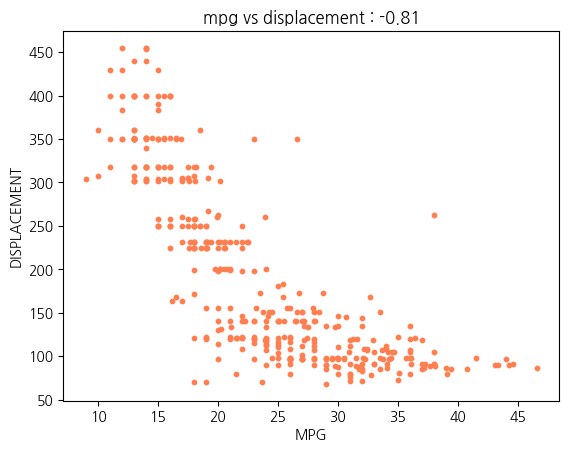

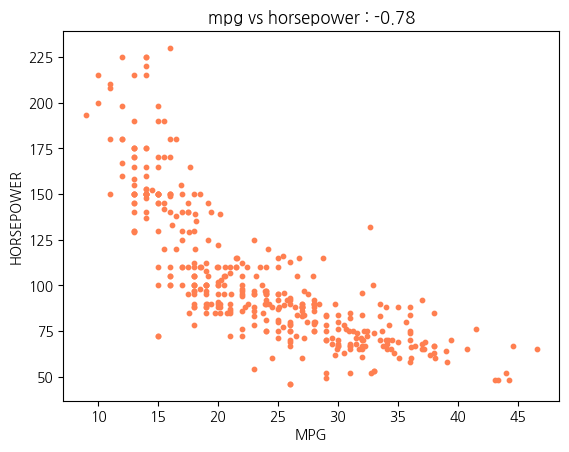

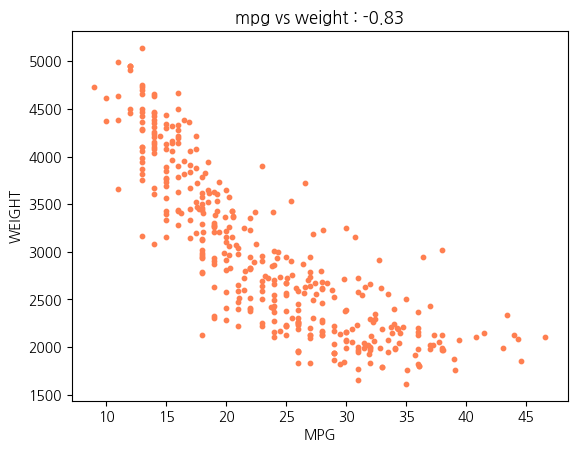

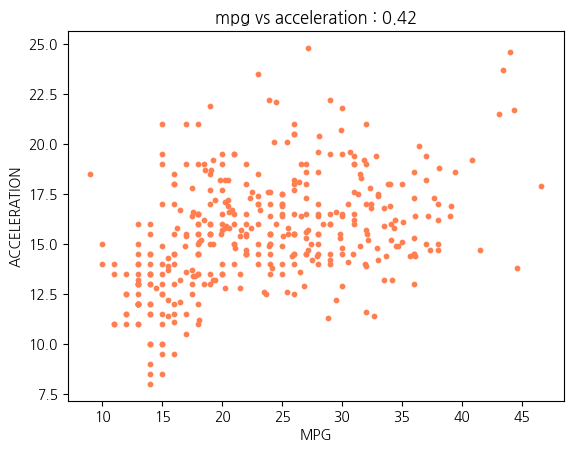

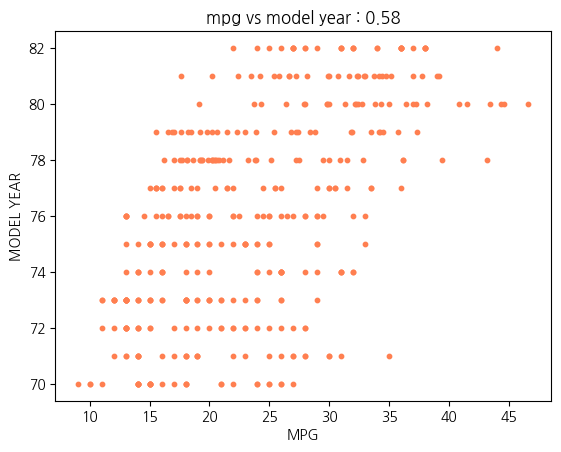

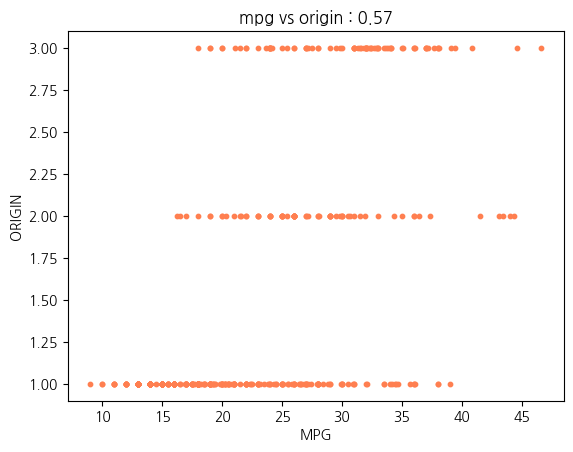

In [8]:
## ----------------------------------------
## 연비 mpg 컬럼과 다른 컬럼들의 관계성 확인
## - 각 컬럼별 패턴(선형/비선형/군집)
## ----------------------------------------
## => mpg컬럼과  car name 컬럼제외한 나머지
for col in dataDF.columns[1:-1]:

    xData = dataDF['mpg']
    yData = dataDF[col]
    corr_ = dataDF[['mpg',col]].corr().loc[col,'mpg']

    ## 그래프
    plt.scatter(xData, yData,  c='coral',  s=10)
    plt.title(f'mpg vs {col} : {corr_:.2f}')
    plt.xlabel('MPG')
    plt.ylabel(f'{col.upper()}')
    plt.show()
    

- 여러 개 그래프를 하나의 Figure에 그리기<hr>

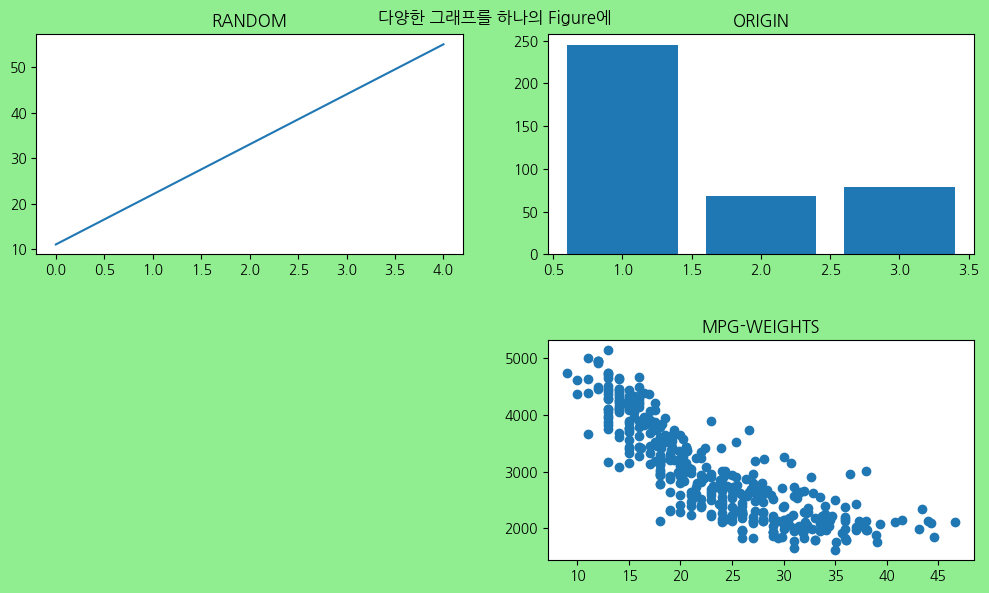

In [26]:
## =====================================
## [1] plt.subplot(행, 열, 인덱스)
## =====================================
## => 3개 그래프를 2행 2열에 그리기


## 도화지 즉, figure 크기 설정
fig=plt.figure(figsize=(10,6))
fig.set_facecolor('lightgreen') # 배경색

## 2행 2열 중에 1번쨰 선그래프
plt.subplot(2, 2, 1)
plt.plot([11,22,33,44,55])
plt.title("RANDOM")

## 2행 2열 중에 2번째 막대 그래프
plt.subplot(2, 2, 2)
sr=dataDF['origin'].value_counts()
plt.bar([1,2,3], [245, 68, 79])
plt.title("ORIGIN")

## 2행 2열 중에 4번째 산점도 그래프
plt.subplot(2, 2, 4)
plt.scatter(dataDF['mpg'], dataDF['weight'])
plt.title("MPG-WEIGHTS")


##여러개 그래프 배치 설정
plt.tight_layout(h_pad=3, w_pad=3)
 
## 여러개 그래프에 대한 타이틀
plt.suptitle("다양한 그래프를 하나의 Figure에")

## 그래프 출력
plt.show()

In [11]:
dataDF.columns, dataDF.columns[1], dataDF.columns[7]

(Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model year', 'origin', 'car name'],
       dtype='object'),
 'cylinders',
 'origin')

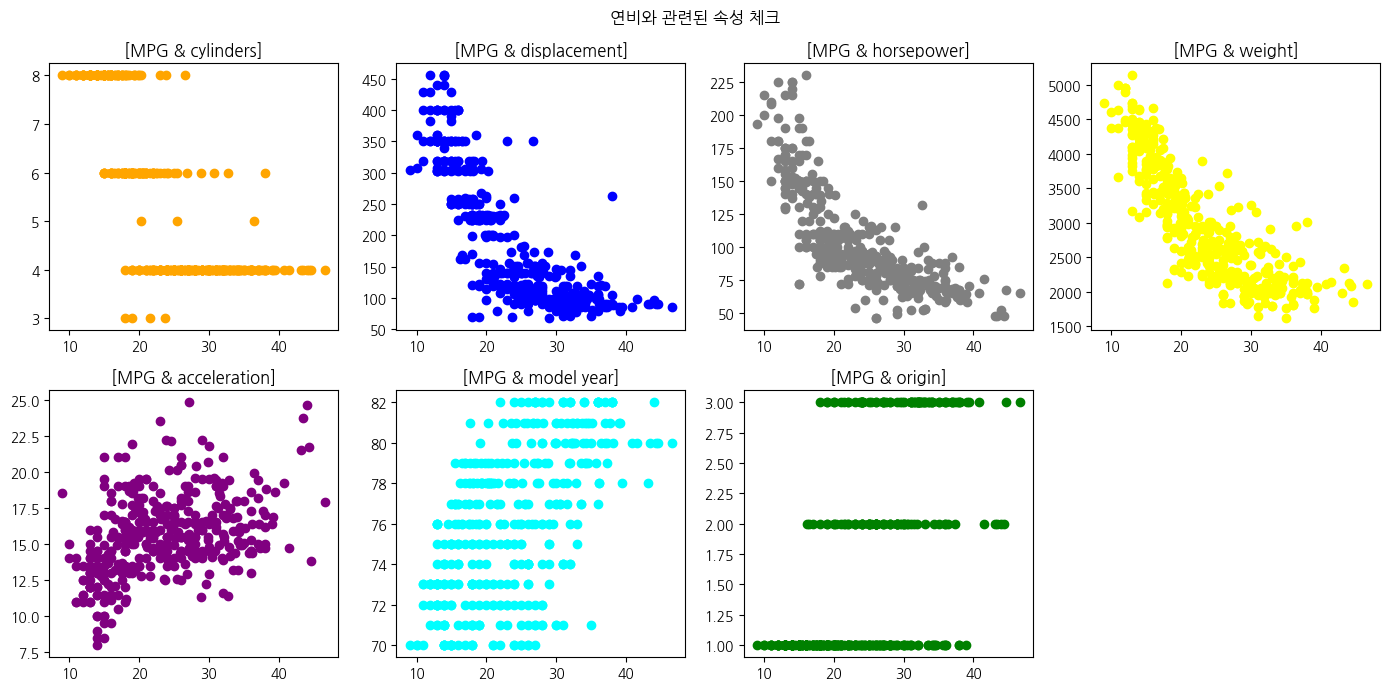

In [12]:
## [2] auto_mpg의 mpg와 다른 피쳐들의 관계성 
## -> 7개 : 2행 4열
colors=['','orange','blue','gray','yellow','purple','cyan','green']

plt.figure(figsize=(14, 7))
for idx in range(1, 8):
    plt.subplot(2, 4, idx)
    plt.scatter(dataDF['mpg'], dataDF[dataDF.columns[idx]], c=colors[idx])
    plt.title(f'[MPG & {dataDF.columns[idx]}]')

## 여러 개 그래프를 대표하는 제목
plt.suptitle("연비와 관련된 속성 체크", fontsize='large')
plt.tight_layout()
plt.show()


Figure(640x480) [[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
Figure(640x480) [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


C:\Users\lsj03\AppData\Local\Temp\ipykernel_27944\2150635852.py:20: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


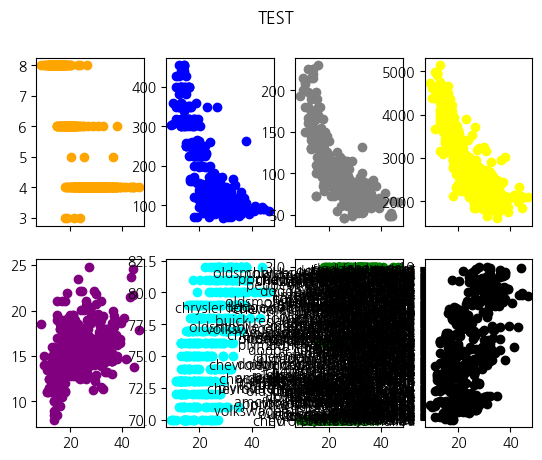

In [27]:
## [3] auto_mpg의 mpg와 다른 피쳐들의 관계성 
## -> 7개 : 2행 4열
colors=['orange','blue','gray','yellow','purple','cyan','green', 'black']

## 행x열 개수의 2D axes 반환
fig, axes = plt.subplots(2,4, sharex=True)
print(fig, axes)

## 2D axes => 1D axes
axes= axes.flatten()
print(fig, axes)

## 1D axes 단일 for문으로 처리
for idx in range(8):
    axes[idx].scatter(dataDF['mpg'], dataDF[dataDF.columns[idx+1]], c=colors[idx])


## 그래프에 타이틀과 배치간격 설정
plt.suptitle("TEST")
plt.tight_layout()

## 화면 출력
plt.show()